i_plot= 1
i_plot= 2
i_plot= 3
i_plot= 4
i_plot= 5
i_plot= 1
i_plot= 2
i_plot= 3
i_plot= 4
i_plot= 5
i_plot= 1
i_plot= 2
i_plot= 3
i_plot= 4
i_plot= 5
i_plot= 1
i_plot= 2
i_plot= 3
i_plot= 4
i_plot= 5


'\n    \n# print(meanAll)\n# print(meanAll_error)\n# print(widthAll)\n# print(widthAll_error)\n\ndata=[np.array(meanAll), np.array(widthAll)]\nerror=[np.array(meanAll_error), np.array(widthAll_error)]\n\n\n\n# Take away the truth and add error in qudrature \nfor i_data in range(0 ,2):\n    for i_station in range(0, stationN):\n        for i_global in range(0, globalN):\n            data[i_data][i_station][i_global] = data[i_data][i_station][i_global] -  data[i_data][i_station][i_global][0]\n            for i_state in range(0, stateN):\n                error[i_data][i_station][i_global][i_state] = math.sqrt(error[i_data][i_station][i_global][i_state] **2 +  error[i_data][i_station][i_global][0] ** 2)\n\nresults = stateN + stationN\nxLabel=r"Maximum offset in M1 and M8 [$\\mathrm{\\mu}$m]"\nyLabel = [r"$\\Delta$ Mean Vertical [mm]", r"$\\Delta$ Mean Radial [mm]", r"$\\Delta$ Width Verical [mm]", r"$\\Delta$ Width Radial [mm]"]\nx_ticks = [0, +233, -223, +116, -116, +23.3, -23.3]\ncolors 

Info in <TCanvas::Print>: png file ExtrapVertical_12.png has been created
Info in <TCanvas::Print>: png file ExtrapVertical_18.png has been created
Info in <TCanvas::Print>: png file ExtrapRadial_12.png has been created
Info in <TCanvas::Print>: png file ExtrapRadial_18.png has been created


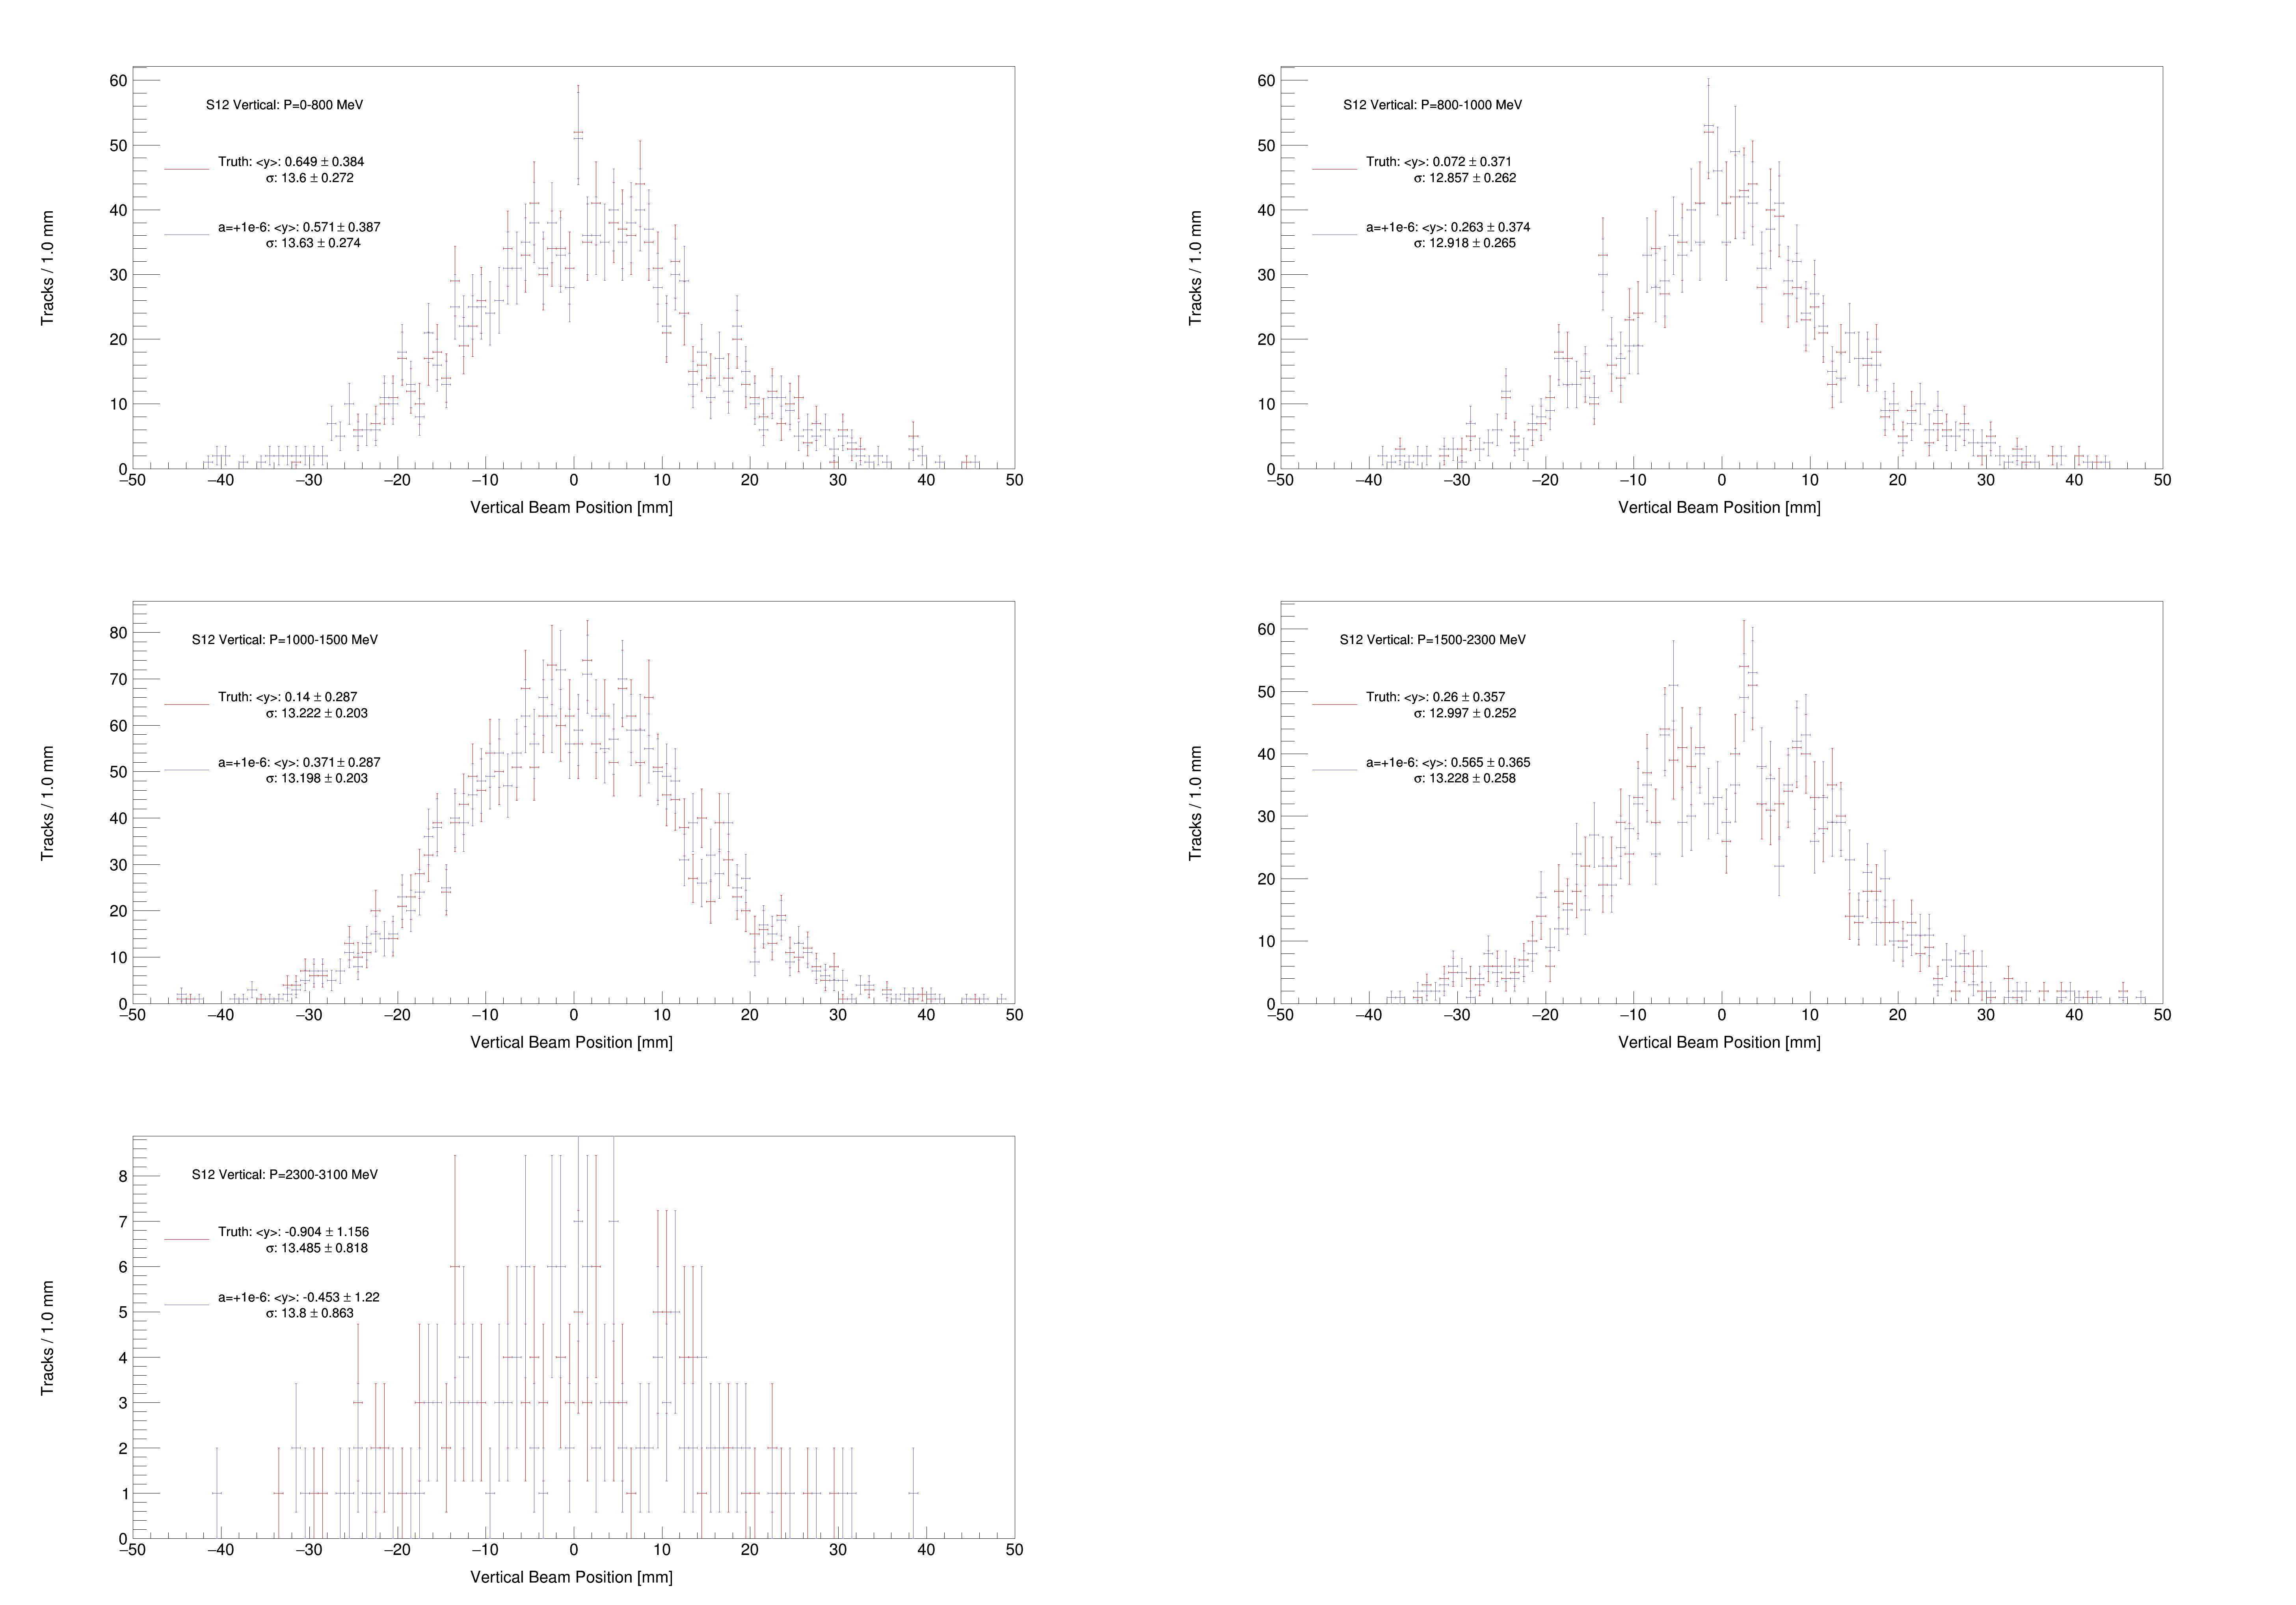

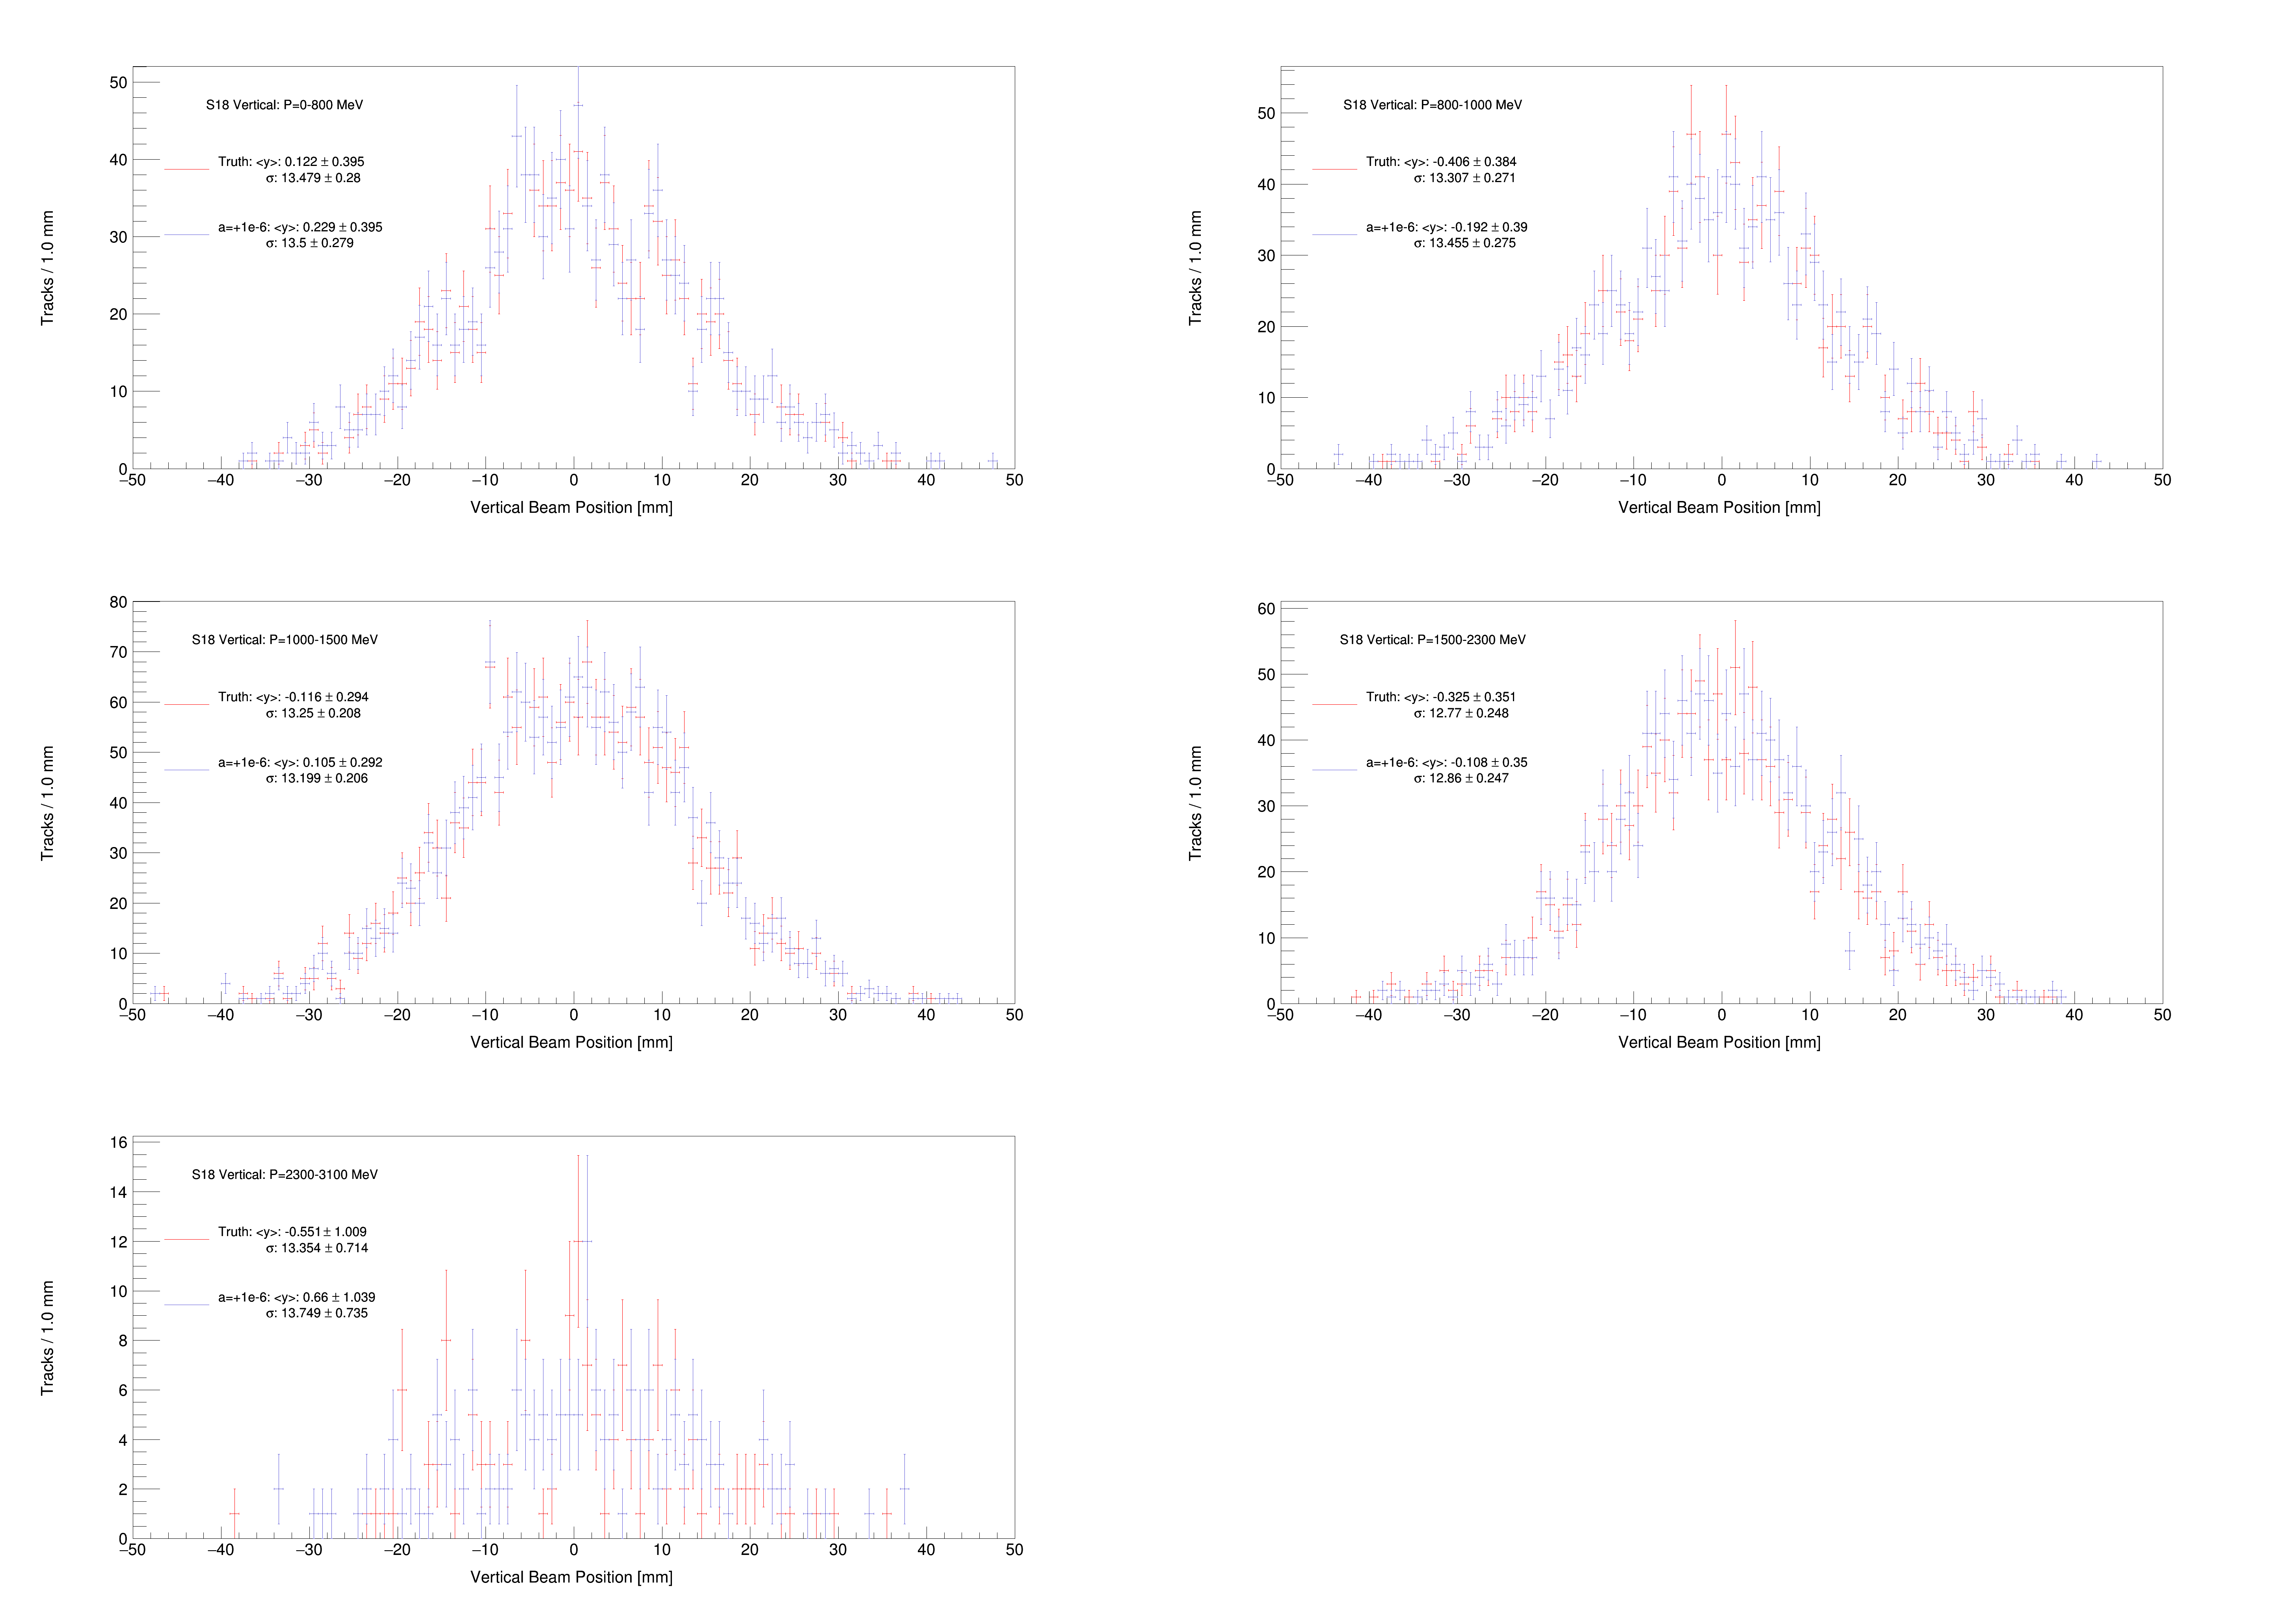

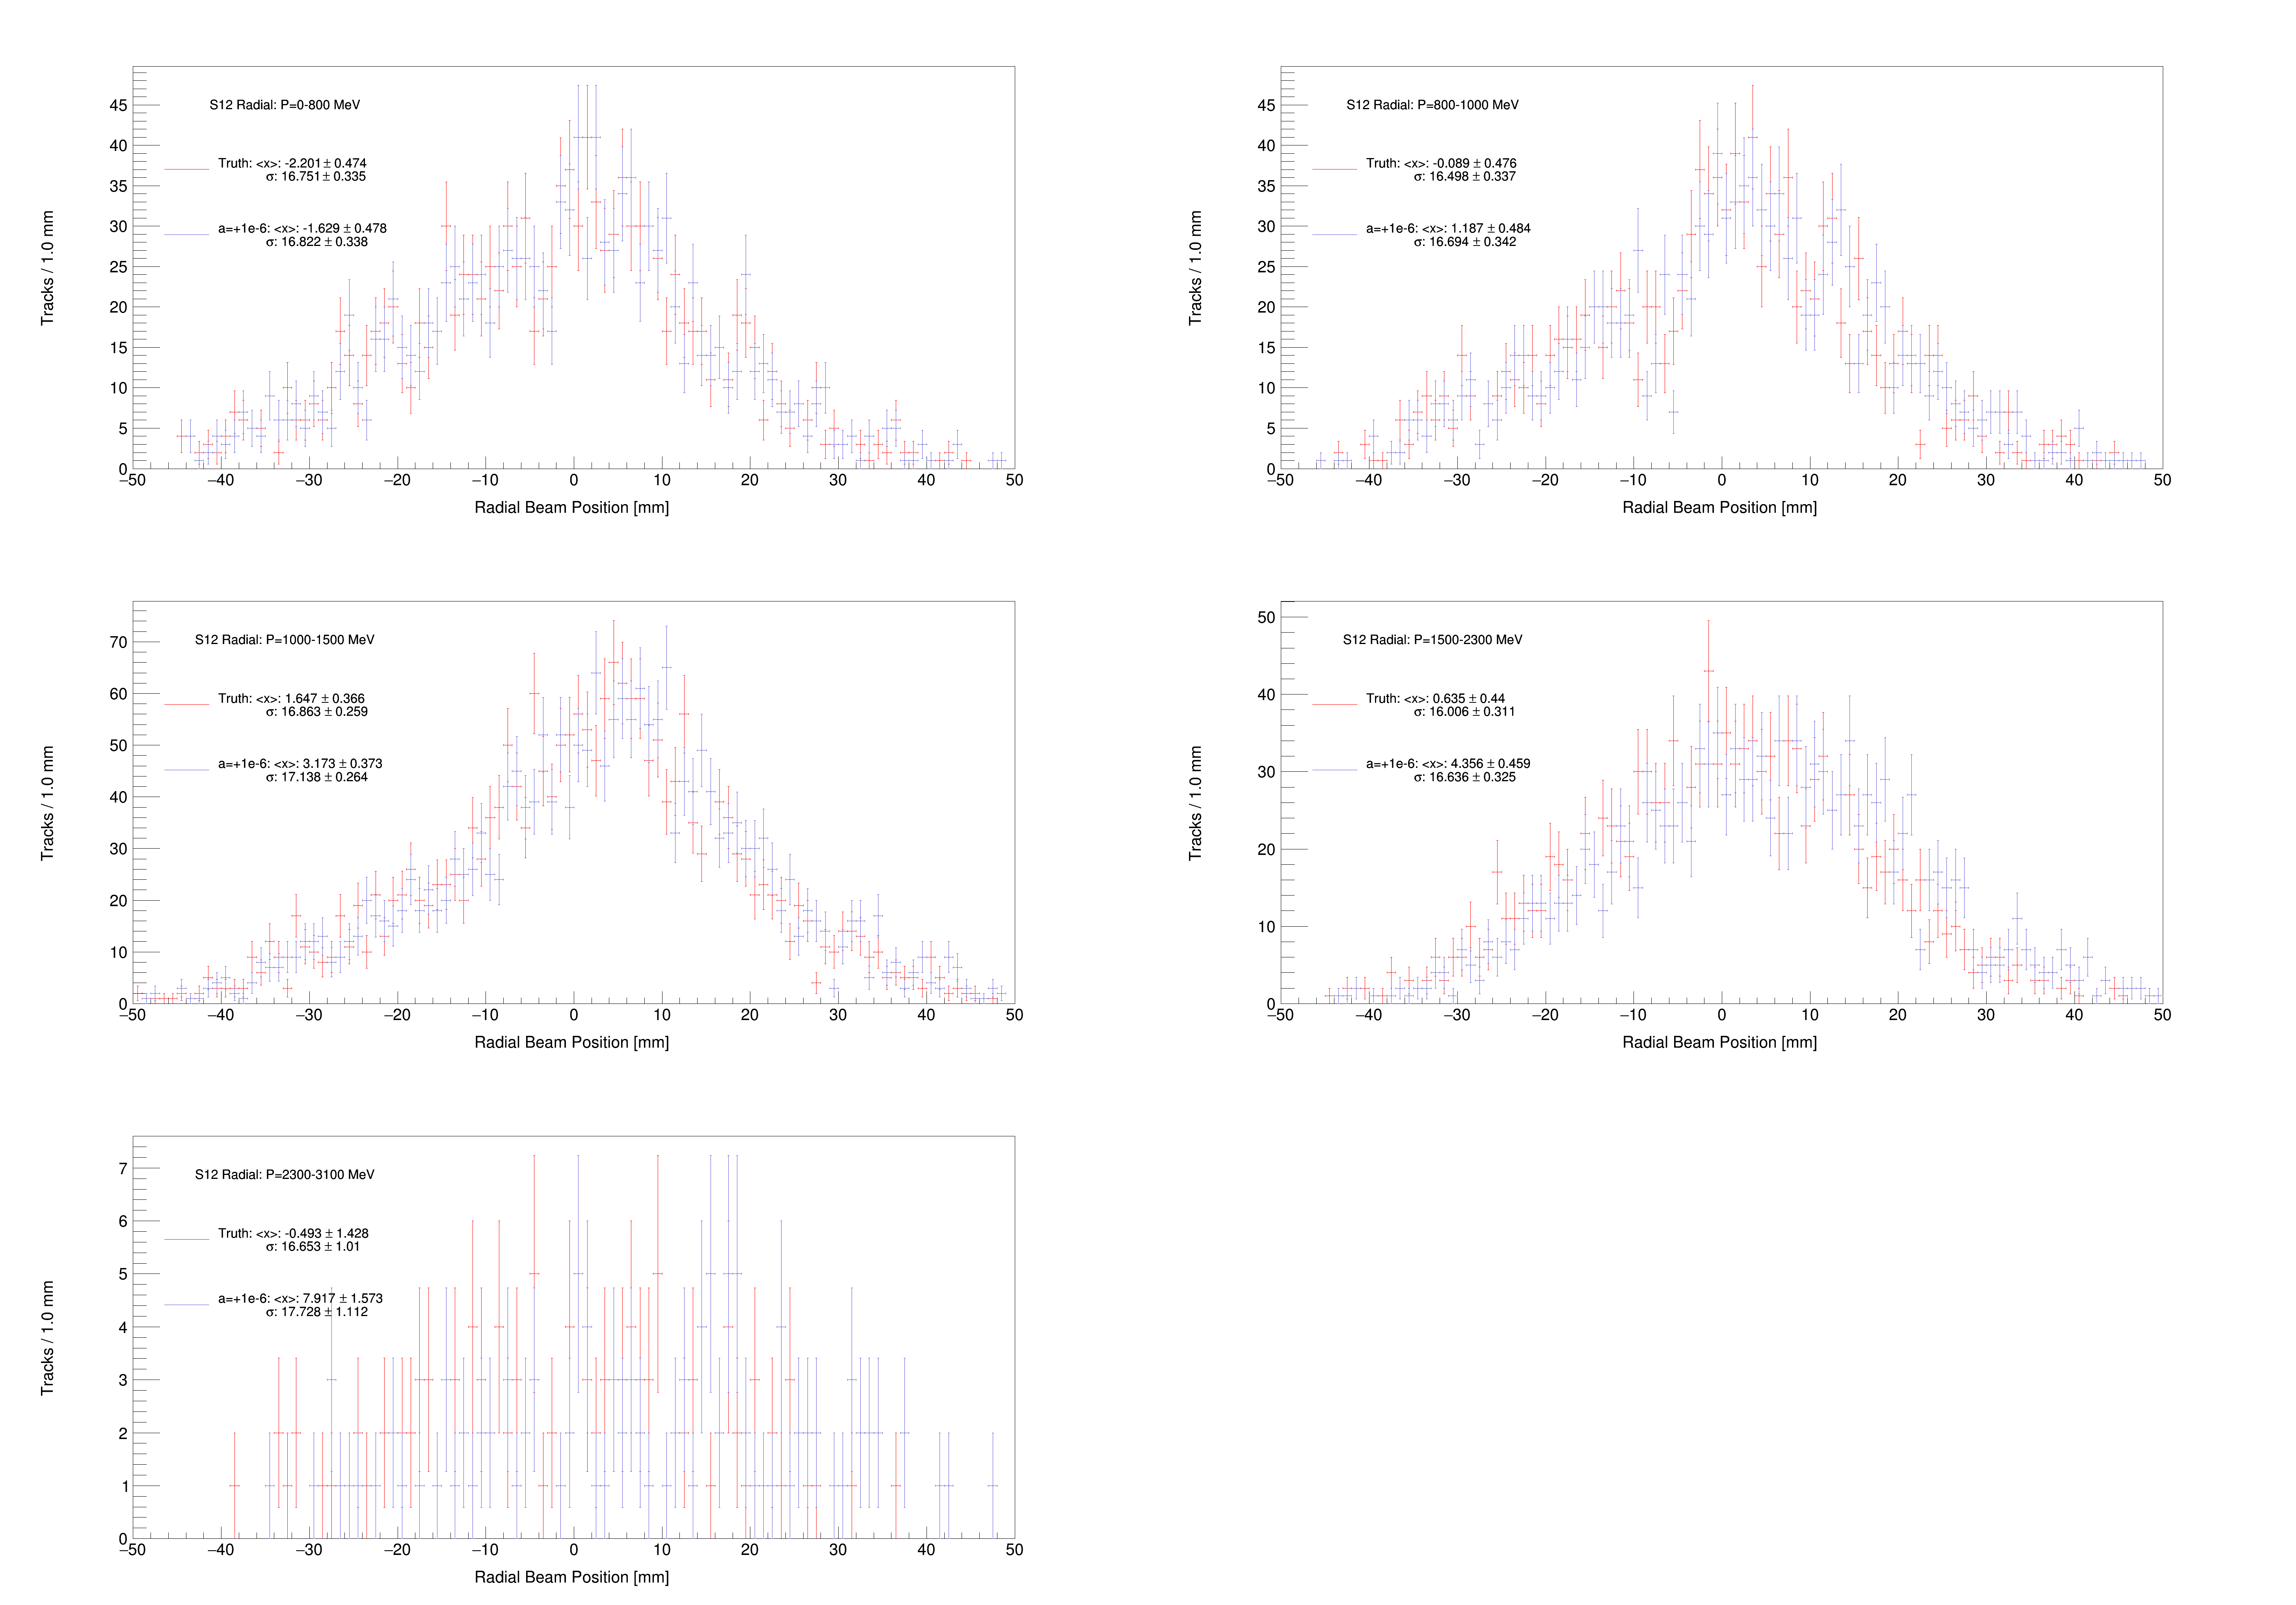

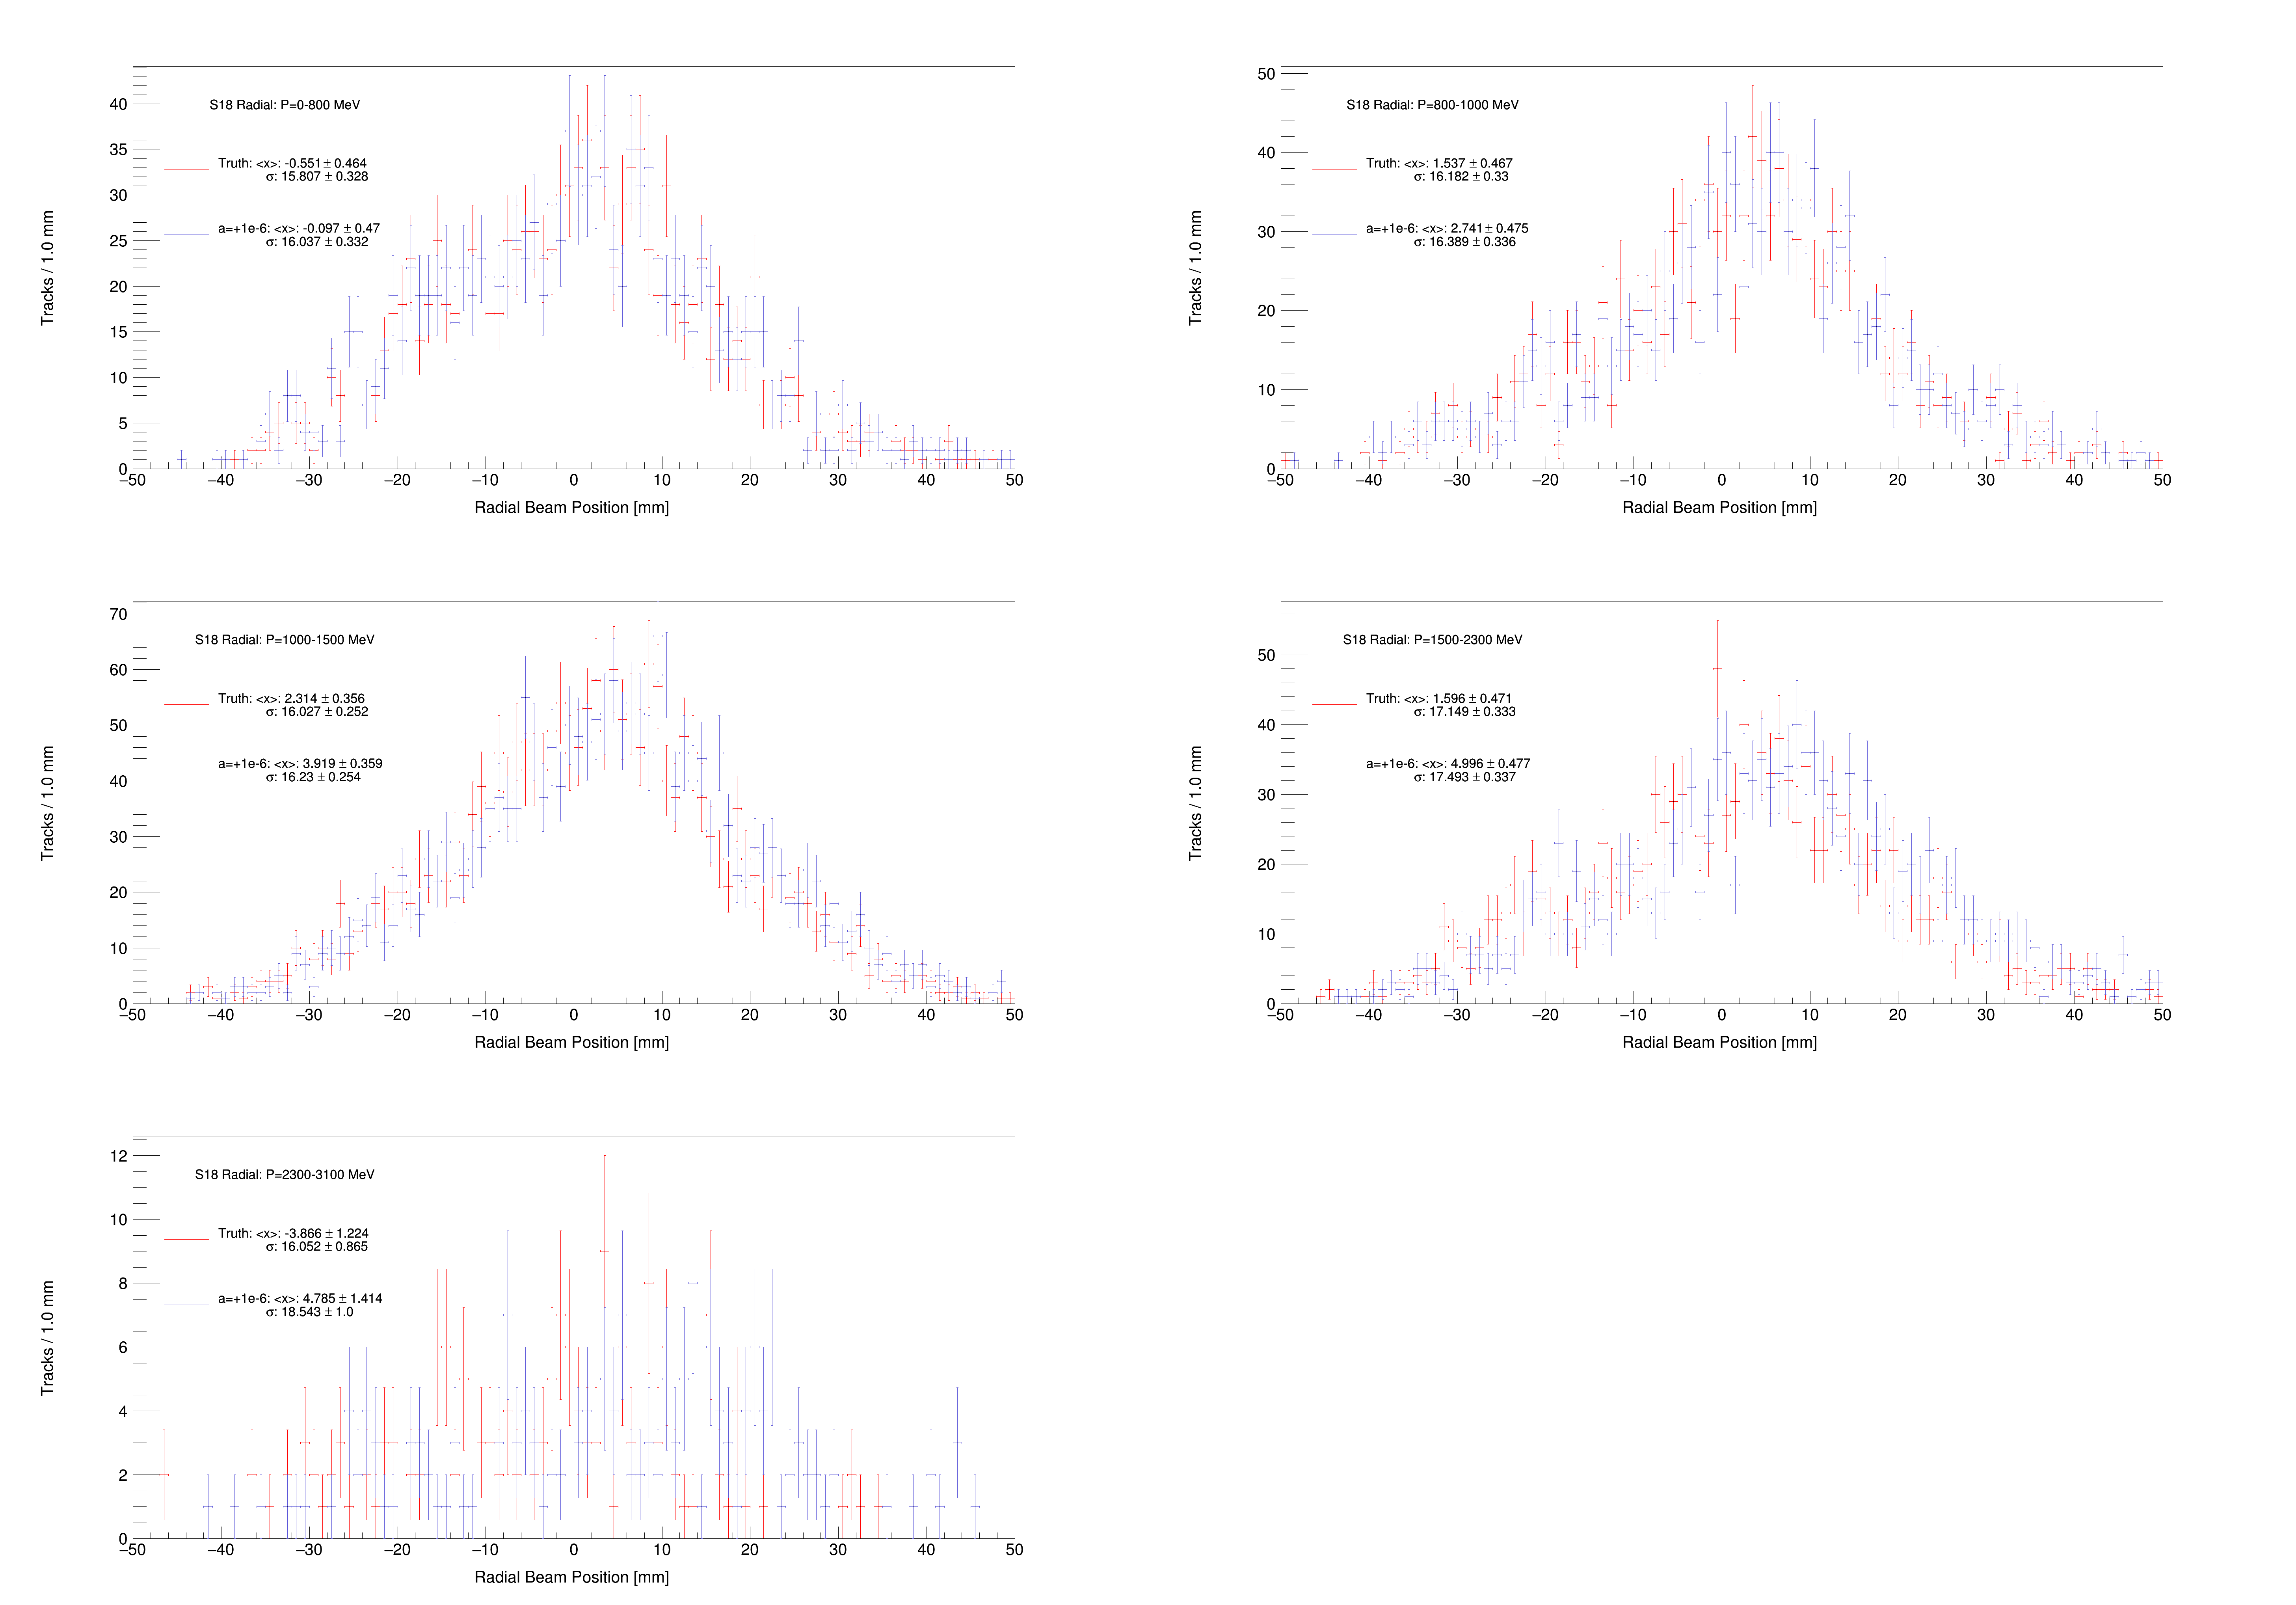

In [13]:
# Juoyer ROOT import 
import sys
sys.path.append("/usr/local/Cellar/root/6.14.04_2/lib/root")
# ROOT includes 
from ROOT import TH1D, TH2D, TF1, TCanvas, TFile, gStyle, TLegend, gROOT
import numpy as np
import math
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt #for plotting  
import numpy.polynomial.polynomial as poly
import matplotlib.ticker as plticker
   
#Define constant paths and labels 
topDir = "/Users/gleb/software/alignTrack/mpIIDESY/MomSlices/"
momSlice = ("_0_800" , "_800_1000", "_1000_1500", "_1500_2300", "_2300_3100")
momName = ("0-800" , "800-1000", "1000-1500", "1500-2300", "2300-3100")
states=("Truth", "a=+1e-6")
stateN = len(states)
slicesN = len(momSlice)
fileName="gm2tracker_MomSlices_ana.root"
plotPath= "MomentumSlices/vertices/"
stations=[12, 18]
stationN=len(stations)

round_to = 3

#Final plots and canvases names (looped over i_plot)
canvasTitle = ["Vertical", "Radial"]
globalN=len(canvasTitle)
plotName = ["h_verticalPos", "h_radialPos"]
results = ["<y>", "<x>"]
xTitles= ["Vertical Beam Position", "Radial Beam Position"]

#Legen labels (looped over i_state)
legendName = states
colorLine = [2, 9, 8, 1, 6, 7, 5] # red, blue, green, black, purple, cyan, yellow 
colorHisto = colorLine

#Open TFiles (looped over i_state)

fileArray = [] # keep files in scope
histArray = [] # keep hists in scope
legendArray = [] #keep legends in scope 
canvasArray=[]

#Global empty containers to be filled for vertical or radial (in the main loop)
result = "-1"
mean = -1
mean_error = -1 
sd = -1 
sd_error = -1 
meanArray=[] # for the final FoM shift-nominal 

#for plotting summary plots
widthAll = [[[0 for i_state in range (0, stateN)] for i_global in range(globalN) ] for i_station in range(stationN) ]
widthAll_error = [[[0 for i_state in range (0, stateN)] for i_global in range(globalN)] for i_station in range(stationN) ] 
meanAll = [[[0 for i_state in range (0, stateN)] for i_global in range(globalN) ] for i_station in range(stationN) ] 
meanAll_error = [[[0 for i_state in range (0, stateN)] for i_global in range(globalN) ] for i_station in range(stationN) ] 

###### Plotting ##########
gStyle.SetOptStat(0)
gStyle.SetOptFit(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetLegendTextSize(0.55)

#rad ver
for i_global in range(0, globalN):
    #Make new canvas for plots (5 in total)
    for i_station in range(0, stationN): 
        canvas = TCanvas("can"+str(i_global)+str(i_station), "", 5830, 4100)
        canvas.Divide(2, 3)
        canvasArray.append(canvas)
        i_plot = 0 
        for i_mom in range(0, slicesN):
            i_plot+=1 
            print("i_plot=" , i_plot)
            legend =  TLegend(0.12,0.5,0.35,0.89)
            legend.SetFillStyle(0)
            canvas.cd(i_plot) # cd for each station and rad/ver
            
            for i_state in range(0, stateN):

                #Get the TH1F 
                filePath = topDir + states[i_state] + "/" + fileName
                fullHistopath = plotPath + "station" +str(stations[i_station]) + "/" + str(momSlice[i_mom]) + "/" + plotName[i_global]
                #print(filePath)
                #print(fullHistopath)
                rootFile = TFile.Open(filePath)
                fileArray.append(rootFile)

                #Get the TH2F 
                hist_1D = rootFile.Get(fullHistopath)
                histArray.append(hist_1D)

                #Rebin and minipulate the histo 
#                 hist_1D.Rebin()
                hist_1D.GetXaxis().SetRangeUser(-50, 50) # applying a maximum range cut 
                binN=hist_1D.GetBinWidth(1)

                hist_1D.SetTitle("")
                hist_1D.GetYaxis().SetTitle("Tracks / "+str(binN)+" mm")
                hist_1D.GetXaxis().SetTitle(xTitles[i_global] +" [mm]")       
                hist_1D.GetYaxis().SetTitleOffset(1.4)
                hist_1D.GetXaxis().SetTitleOffset(1.4);
                hist_1D.GetYaxis().CenterTitle()
                hist_1D.GetXaxis().CenterTitle()

                #Draw on canvas 
                hist_1D.SetLineColor(colorHisto[i_state])
                hist_1D.SetMarkerSize(4)
#                 hist_1D.SetLineSize(4)
                if (i_state == 0):
                    hist_1D.Draw("E1")

                else:
                    hist_1D.Draw("E1 same")

                #Get stats from hist 
                mean = hist_1D.GetMean()
                mean_error = hist_1D.GetMeanError()
                sd = hist_1D.GetRMS()
                sd_error = hist_1D.GetRMSError()
                result = results[i_global]
                legenObject = hist_1D
                meanArray.append(mean)
                meanAll[i_station][i_global][i_state]=(mean)
                meanAll_error[i_station][i_global][i_state]=(mean_error)
                widthAll[i_station][i_global][i_state]=(sd)
                widthAll_error[i_station][i_global][i_state]=(sd_error)


                #take care of the legend
                legenValue1 = str(legendName[i_state])+": "+str(result)+": "+str(round(mean,round_to))+" #pm "+str(round(mean_error, round_to)) 
                legenValue2 = "#sigma: "+str(round(sd,round_to))+" #pm "+str(round(sd_error,round_to))
                legend.AddEntry(legenObject,"#splitline{"+str(legenValue1)+"}{           "+str(legenValue2)+"}","L") # make appropriate spacing 
                legend.SetTextSize(.028)
                legend.Draw("same")


                #Do some final massaging per pad 
                legend.SetHeader("S"+str(stations[i_station])+" "+canvasTitle[i_global]+": P=" + momName[i_mom] + " MeV", "C"); # option "C" allows to center the header
                legendArray.append(legend)
                meanArray=[]
        

        #one canvas per rad/ver station 
        canvas.Draw()
        canvas.Print("Extrap"+canvasTitle[i_global]+"_"+str(stations[i_station])+".png")

'''
    
# print(meanAll)
# print(meanAll_error)
# print(widthAll)
# print(widthAll_error)

data=[np.array(meanAll), np.array(widthAll)]
error=[np.array(meanAll_error), np.array(widthAll_error)]



# Take away the truth and add error in qudrature 
for i_data in range(0 ,2):
    for i_station in range(0, stationN):
        for i_global in range(0, globalN):
            data[i_data][i_station][i_global] = data[i_data][i_station][i_global] -  data[i_data][i_station][i_global][0]
            for i_state in range(0, stateN):
                error[i_data][i_station][i_global][i_state] = math.sqrt(error[i_data][i_station][i_global][i_state] **2 +  error[i_data][i_station][i_global][0] ** 2)

results = stateN + stationN
xLabel=r"Maximum offset in M1 and M8 [$\mathrm{\mu}$m]"
yLabel = [r"$\Delta$ Mean Vertical [mm]", r"$\Delta$ Mean Radial [mm]", r"$\Delta$ Width Verical [mm]", r"$\Delta$ Width Radial [mm]"]
x_ticks = [0, +233, -223, +116, -116, +23.3, -23.3]
colors = ["blue", "red"]
labels = ["S12", "S18"]
a_labels=("", "a=+1e-6", "a=-1e-6","a=+0.5e-6", "a=-0.5e-6",  "a=+1e-7", "a=-1e-7")
a_extra_x = [1, 0.9, 1, 1, 1, 1, 1] 
a_extra_y = [1.6, 1, 1, 1, 1, 1, 1]
i_plot=0
fig = plt.figure(figsize=(19,14) )
for i_state in range(0, 2):
        for i_global in range(0, globalN):
            plt.subplot( int( str(22)+str(i_plot+1)) ) 
            axes = plt.gca()
            axes.xaxis.set_major_locator(MaxNLocator(integer=True))

            plt.ylabel(yLabel[i_plot], fontsize=18)
            plt.xlabel(xLabel, fontsize=18)
            plt.xticks(fontsize=18, rotation=0) 
            plt.yticks(fontsize=18, rotation=0)
            plt.minorticks_on()
            axes.tick_params(axis='x', which='minor',bottom=False)
            axes.tick_params(axis='y', which='both', left=True, right=True, direction='inout')
            if (i_plot == 1):
                loc = plticker.MultipleLocator(base=0.25) # this locator puts ticks at regular intervals
                axes.yaxis.set_major_locator(loc)
                plt.ylabel(yLabel[i_plot], fontsize=12)

            #Plot data
            for i_station in range(0, stationN):
                plt.plot(x_ticks, data[i_state][i_station][i_global], color=colors[i_station], marker=".", linewidth=0)  
                plt.errorbar(x_ticks, data[i_state][i_station][i_global],  yerr=error[i_state][i_station][i_global], color=colors[i_station], label=labels[i_station], elinewidth=2, linewidth=0)  
                #Fit a line 
                x_new = np.linspace(float(min(x_ticks)), float(max(x_ticks)), num=1000) # generate x-points for evaluation 
                coefs = poly.polyfit(x_ticks, data[i_state][i_station][i_global], 1) # x2 curve
                ffit = poly.polyval(x_new, coefs) # plot over generated points 
                plt.plot(x_new, ffit, color=colors[i_station])
                
            #anotate points (once per station)
            for i_point, txt in enumerate(a_labels):
                 axes.annotate(txt, (x_ticks[i_point]*a_extra_x[i_point], data[i_state][i_station][i_global][2]), fontsize=11)
            
            axes.legend(loc='upper left', fontsize=18)
            i_plot+=1

plt.tight_layout()
plt.savefig("Summary_Extrap.png", dpi=250)
'''

# 